In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

np.random.seed(21)
housing = fetch_california_housing()
housing

{'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/datasets/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n',
 'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ..., 
        [   1.7       ,   17.    

In [2]:
housing_df = pd.DataFrame(data=np.c_[housing["data"], housing["target"]], columns=housing["feature_names"] + ["target"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [3]:
X = housing["data"]
shuffled_indices = np.random.permutation(np.arange(X.shape[0]))
X_shuffled = X[shuffled_indices]
X_test = X[19000:]
X = X[:19000]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)
X = X.T
X_test = X_test.T

y = housing["target"].reshape(1, -1)
y_shuffled = y[:,shuffled_indices]
y_test = y[:,19000:]
y = y[:,:19000]

In [4]:
def mse(y_predicted, y):
    return 1 / (2 * y.shape[1]) * np.power(y_predicted - y, 2).sum()

def mse_prime(y_predicted, y):
    return y_predicted - y

In [5]:
def relu(x):
    return x * np.float64(x > 0)

def relu_prime(x):
    return np.float64(x > 0)

In [6]:
m = X.shape[1]
n = X.shape[0]

np.random.seed(21)

n1 = 5
n2 = 1
w1 = np.random.randn(n1, n) * .01
w2 = np.random.randn(n2, n1) * .01
b1 = np.zeros((n1, 1))
b2 = np.zeros((n2, 1))

num_epochs = 1000
learning_rate = 0.1

cost_history_nn = []
    
for epoch in range(0, num_epochs):
    
    #forward prop
    z1 = w1.dot(X) + b1
    a1 = relu(z1)
    z2 = w2.dot(a1) + b2
    a2 = z2
    
    #compute and save the cost
    cost = mse(a2, y)
    cost_history_nn.append(cost)
    
    if epoch % 100 == 0:
        print(cost)
    
    #back prop
    dcost_da2 = mse_prime(a2, y)
    da2_dz2 = 1
    dcost_dz2 = np.multiply(dcost_da2, da2_dz2)
    
    dz2_da1 = w2
    dcost_da1 = dz2_da1.T.dot(dcost_dz2)
    da1_dz1 = relu_prime(z1)
    dcost_dz1 = np.multiply(dcost_da1, da1_dz1)
    
    dz2_dw2 = a1
    dcost_dw2 = 1 / m * dcost_dz2.dot(dz2_dw2.T)
    dcost_db2 = 1 / m * dcost_dz2.sum(1, keepdims=True)
    
    dz1_dw1 = X
    dcost_dw1 = 1 / m * dcost_dz1.dot(dz1_dw1.T)
    dcost_db1 = 1 / m * dcost_dz1.sum(1, keepdims=True)
    
    #update params
    w2 = w2 - learning_rate * dcost_dw2
    b2 = b2 - learning_rate * dcost_db2
    
    w1 = w1 - learning_rate * dcost_dw1
    b1 = b1 - learning_rate * dcost_db1
    

z1 = w1.dot(X_test) + b1
a1 = relu(z1)
z2 = w2.dot(a1) + b2
a2 = z2

print("test error:", np.sqrt(mean_squared_error(a2, y_test)))

2.90059191025
0.332123799265
0.260667466988
0.234752405593
0.225951644554
0.220663526441
0.216964351402
0.214691658297
0.213485622141
0.212631564139
test error: 0.506338895489


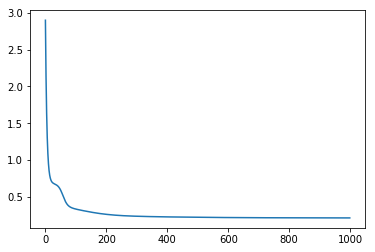

In [7]:
plt.plot(np.arange(0, num_epochs), cost_history_nn)
plt.show()